# Assigment 1
*The exercises have been solved in collaboration between the following students:*
* Christian Kjær, s124324
* Kristiam Dam-Jensen, s113103
* Henriette Steenhoff, s134869

## Part One: Network Models

### Watts-Strogatz Networks

<description>

*description*

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Initializing the graphs
G1 = nx.watts_strogatz_graph(500,4,0.0)
G2 = nx.watts_strogatz_graph(500,4,0.1)
G3 = nx.watts_strogatz_graph(500,4,1)

# Calculation of average shortest path lenght
print "Average shortest path G1: ", nx.average_shortest_path_length(G1)
print "Average shortest path G2: ", nx.average_shortest_path_length(G2)
print "Average shortest path G3: ", nx.average_shortest_path_length(G3)

Average shortest path G1:  62.875751503
Average shortest path G2:  7.84097795591
Average shortest path G3:  4.78150701403


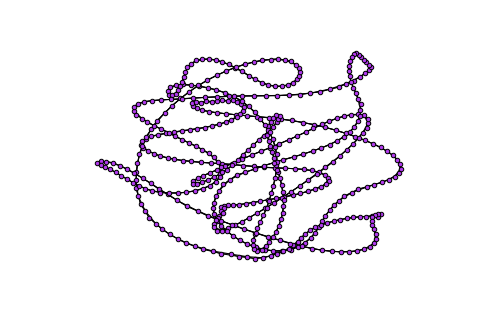

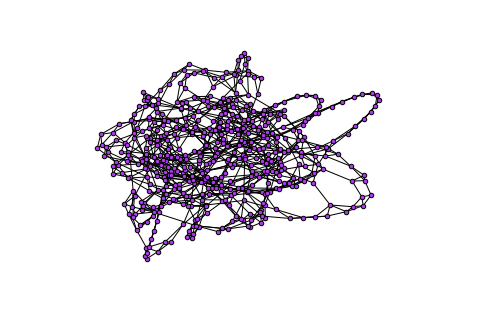

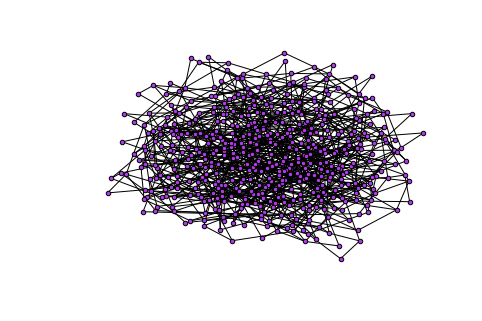

In [27]:
# Plot the networks to visualize the difference 
nx.draw_spring(G1,node_size=20,node_color='#B23AEE',scale=1)
plt.show()
nx.draw_spring(G2,node_size=20,node_color='#B23AEE',scale=1)
plt.show()
nx.draw_spring(G3,node_size=20,node_color='#B23AEE',scale=1)
plt.show()

**What happens to te network when $p = 1$?**

When $p = 1$ the probability that there exist a link between any of the nodes in the graph is $100\%$ which means that all nodes are connected. Thus we get a giant component.

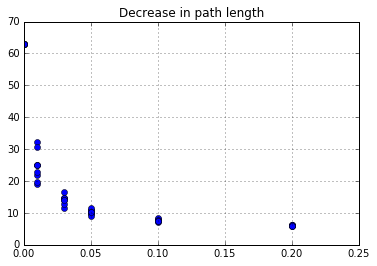

In [31]:
# Creating the 500 networks
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The plot
p = [0,0.01,0.03,0.05,0.1,0.2]
avg_list = []
p_new = []

# Generating the 50 networks
for i in range(0,50):
    G4 = nx.watts_strogatz_graph(500,4,p[i % int(len(p))])
    avg_list.append(nx.average_shortest_path_length(G4))
    p_new.append(p[i % int(len(p))])

plt.grid(True)
plt.title("Decrease in path length")
plt.errorbar(p_new, avg_list, fmt='o')
plt.show()

### The Barabasi-Albert Model

The 100 node network

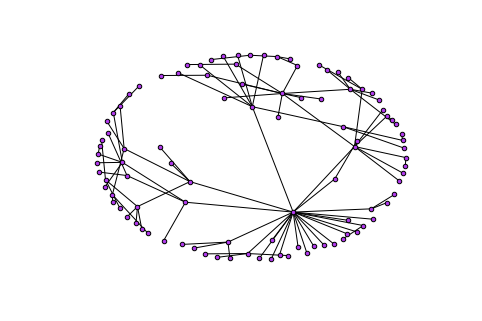

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import random
%matplotlib inline

# Graph of one single link between two nodes
G1 = nx.Graph()
G1.add_nodes_from([0,1])
G1.add_edge(0,1)
n = 100 # number of final nodes, nice way to look at different examples


# Repeating the action until 100 nodes
for ii in range(0,n):
    # Making flat list with list comprehension
    num_list = G1.edges()
    flat_list = [num for elem in num_list for num in elem]

    # Adding new node and choosing random link
    G1.add_node(ii)
    G1.add_edge(ii,random.choice(flat_list)) 

# Draw graph
nx.draw_spring(G1,node_size=20,node_color='#B23AEE',scale=2)
plt.show()

# The easy way
#G = nx.barabasi_albert_graph(100,99)

The 5000 node network

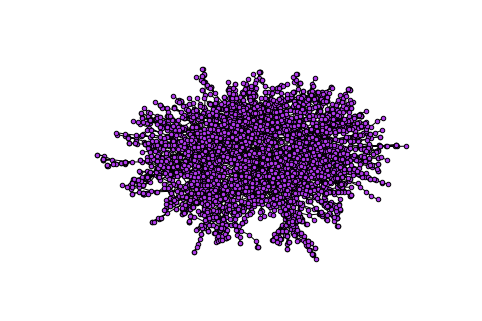

In [64]:
# Graph of one single link between two nodes
G1 = nx.Graph()
G1.add_nodes_from([0,1])
G1.add_edge(0,1)
flat_list = []
n = 5000 # number of final nodes, nice way to look at different examples


# Repeating the action until 100 nodes
for ii in range(0,n):
    # Making flat list with list comprehension
    num_list = G1.edges()
    flat_list = [num for elem in num_list for num in elem]

    # Adding new node and choosing random link
    G1.add_node(ii)
    G1.add_edge(ii,random.choice(flat_list)) 

# Draw graph
nx.draw_spring(G1,node_size=20,node_color='#B23AEE',scale=2)
plt.show()

# The easy way
#G = nx.barabasi_albert_graph(100,99)

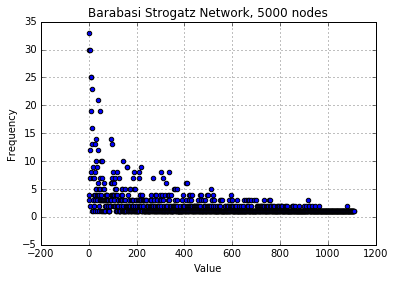

In [63]:
import numpy as np
from collections import Counter

labels, values = zip(*Counter(flat_list).items())
# Plot the binned degree distribution
plt.scatter(labels, values) # added a few extra bins

# For readability
plt.grid(True)
plt.title("Barabasi Strogatz Network, 5000 nodes")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [36]:
# Find min and max values (from histogram it should be among the lower numbers)
c = Counter(flat_list)
print("Max value: " + str(max(c.values())))
print("Min value: " + str(min(c.values())))

Max value: 261
Min value: 1


### The Power-laws and the Friendship Paradox

*description*

In [68]:
# Network manipulation - friendship paradox
# Using the graph from the previous exercise
total = 0
n = 1000
avg_cnt = 0

for ii in range(0,n):
    rand_node = random.choice(flat_list)
    print "Node:                 ", rand_node
    # Degree of random node
    print "Degree:               ", G1.degree(rand_node)
    # Neighbors of the random node
    print "Neighbors:            ", G1.neighbors(rand_node)
    
    # Find degrees of neighboring nodes
    for neighbor in G1.neighbors(rand_node):
        avg_cnt = avg_cnt + G1.degree(neighbor)
    # Check whether the average degree is less than or greater than rand node
    if(avg_cnt/len(G1.neighbors(rand_node)) > G1.degree(rand_node)):
        total = total + 1 
        print "Avg degree neighbors: ", avg_cnt/len(G1.neighbors(rand_node))
    avg_cnt = 0

# Print result
print "The paradox is true ", total, " times out of", n


Node:                  3982
Degree:                2
Neighbors:             [2753, 4485]
Node:                  173
Degree:                8
Neighbors:             [3, 1094, 4007, 2665, 1613, 336, 1596, 1341]
Avg degree neighbors:  12
Node:                  693
Degree:                11
Neighbors:             [1731, 868, 4103, 1484, 1359, 1777, 2773, 1796, 58, 4068, 2815]
Node:                  2240
Degree:                2
Neighbors:             [3140, 2101]
Avg degree neighbors:  3
Node:                  4437
Degree:                1
Neighbors:             [3755]
Avg degree neighbors:  2
Node:                  281
Degree:                14
Neighbors:             [321, 1506, 547, 486, 241, 2544, 1105, 2899, 2325, 2870, 3801, 3640, 3489, 2266]
Node:                  290
Degree:                11
Neighbors:             [3683, 2023, 3847, 1004, 274, 1619, 4661, 2074, 2203, 4263, 926]
Node:                  2406
Degree:                3
Neighbors:             [4152, 3379, 1230]
Node:     

The friendship paradox is true more than half the time after running a thousand simulations.

### Growth without Preferential Attachment

*description*

In [73]:
# New graph, same procedure

G5 = nx.erdos_renyi_graph(5000,0.15)
total = 0

for ii in range(0,n):
    rand_node = random.randint(0,4999)
    print "Node:                 ", rand_node
    # Degree of random node
    print "Degree:               ", G5.degree(rand_node)
    # Neighbors of the random node
    print "Neighbors:            ", G5.neighbors(rand_node)
    
    # Find degrees of neighboring nodes
    for neighbor in G5.neighbors(rand_node):
        avg_cnt = avg_cnt + G5.degree(neighbor)
    # Check whether the average degree is less than or greater than rand node
    if(avg_cnt/len(G5.neighbors(rand_node)) > G5.degree(rand_node)):
        total = total + 1 
        #print "Avg degree neighbors: ", avg_cnt/len(G5.neighbors(rand_node))
    avg_cnt = 0

# Print result
print "The paradox is true ", total, " times out of", n


Node:                  4985
Degree:                776
Neighbors:             [1, 3, 2062, 15, 4112, 18, 29, 4128, 33, 34, 35, 4843, 2091, 4141, 47, 2097, 4149, 4150, 2103, 4298, 58, 63, 68, 2120, 73, 4170, 3003, 78, 2128, 82, 84, 4110, 4182, 4793, 2144, 2731, 105, 4455, 108, 109, 2160, 114, 2165, 4216, 121, 122, 2174, 2175, 4224, 2180, 2182, 136, 2189, 2194, 2197, 152, 2203, 156, 4805, 166, 167, 3929, 2222, 4302, 178, 179, 2228, 4278, 184, 2233, 186, 2236, 3786, 2240, 2245, 201, 202, 2254, 4303, 4307, 2260, 2262, 3449, 2265, 218, 2267, 2269, 223, 225, 2276, 229, 2278, 4713, 232, 233, 3622, 2284, 4333, 2286, 4335, 241, 4819, 2295, 4346, 252, 2305, 2309, 4358, 4360, 4362, 2315, 269, 271, 274, 276, 278, 2328, 283, 2333, 286, 4715, 4389, 296, 2780, 2346, 4395, 2348, 2349, 2465, 4404, 3124, 2363, 2365, 318, 319, 2368, 321, 322, 2372, 325, 328, 4425, 332, 2381, 335, 3489, 2386, 2387, 340, 2390, 344, 2394, 2398, 351, 352, 354, 355, 4454, 359, 363, 2412, 366, 370, 371, 2420, 2424, 377, 2427, 

The paradox is not true on average.

## Part Two: The Wikipedia Philosopher's Network

### Basic Statistics

**Philosophers in each list **

In [19]:
import re
import urllib2
import json
import numpy as np
response = urllib2.urlopen('https://en.wikipedia.org/wiki/List_of_aestheticians')
html = response.read()

In [20]:
# Getting the philosopher informatiom
baseurl    = "https://en.wikipedia.org/w/api.php?"
action     = "action=query"
title      = "titles="
content    = "prop=revisions&rvprop=content"
dataformat = "format=json"

# List of all Philosophers by core area
list_phil = ['List_of_aestheticians','List_of_epistemologists','List_of_ethicists','List_of_logicians','List_of_metaphysicians','List_of_social_and_political_philosophers']
query = []     # current query to process
phil_count = 0 # accumulated count of philosophers in each group
all_phil = []  # final list of all philosophers

# constructing query for getting all Philosopher data
for core_area in list_phil:
    query = "%s%s&%s&%s&%s&utf8=" % (baseurl,action,title+core_area,content,dataformat)

    f = urllib2.urlopen(query)
    area_links = re.findall(r'\*.?\[\[([^\]|]+)\|?[^\]]*\]\]',f.read())
    trim_area_links = [item for item in area_links if not item.lower().startswith('list of')]
    all_phil.extend(trim_area_links)
    print "Query for:", core_area
    print (query)
    print "Number of philosophers: ", len(trim_area_links)
    print
    #print trim_area_links
    
    # Accumulate number of philosophers
    phil_count = phil_count + len(trim_area_links)

all_phil = sorted(all_phil)
print "Philosophers in all: ", phil_count

Query for: List_of_aestheticians
https://en.wikipedia.org/w/api.php?action=query&titles=List_of_aestheticians&prop=revisions&rvprop=content&format=json&utf8=
Number of philosophers:  124

Query for: List_of_epistemologists
https://en.wikipedia.org/w/api.php?action=query&titles=List_of_epistemologists&prop=revisions&rvprop=content&format=json&utf8=
Number of philosophers:  98

Query for: List_of_ethicists
https://en.wikipedia.org/w/api.php?action=query&titles=List_of_ethicists&prop=revisions&rvprop=content&format=json&utf8=
Number of philosophers:  272

Query for: List_of_logicians
https://en.wikipedia.org/w/api.php?action=query&titles=List_of_logicians&prop=revisions&rvprop=content&format=json&utf8=
Number of philosophers:  271

Query for: List_of_metaphysicians
https://en.wikipedia.org/w/api.php?action=query&titles=List_of_metaphysicians&prop=revisions&rvprop=content&format=json&utf8=
Number of philosophers:  96

Query for: List_of_social_and_political_philosophers
https://en.wikipedi

**Which is the largest branch of philosophy?**

Judging by the number of philosophers in the different groups from the exercise above, the philosophers within **social and political philosophy** is the greatest branch with 294 philosophers. They are closely followed by Logicians and Ethicists.

**Philosophers in several lists?**

To solve this problem it is easiest to use the list of all philosophers **all_phil**. This has been slightly modified such that only unique values remain.

In [25]:
from collections import Counter
in_several_lists = Counter(all_phil)

# Print most popular philosopher
print "Philosopher in most lists: "
print in_several_lists.most_common(1)

## The list of all unique philosophers
unique_all_phil = np.unique(all_phil)

## Printing the values
#for philosopher in unique_all_phil.flat:
#    print(philosopher)


Philosopher in most lists: 
[('Aristotle', 6)]


**Philosophers in several sub-fields**

To solve this problem it is easiest to use the list of all philosophers. To see whether they are in several lists, one need to look at the list with all names, where none has been removed to avoid duplication.

**List of every philosopher occuring in more than one list descendingly**

In [70]:
import operator

popular_phil = {}
temp = dict(Counter(in_several_lists))

# Getting the values of philosophers in lists > 1
for key, value in temp.iteritems():
    if value > 1:
        popular_phil[key] = value

        # Sort by occurences and print the philosophers
sorted_phil = sorted(popular_phil.items(), key=lambda x: (-x[1], x[0]))
print '\n'.join(map(str, sorted_phil))

('Aristotle', 6)
('Bertrand Russell', 5)
('Immanuel Kant', 5)
('Plato', 5)
('Ayn Rand', 4)
('Arthur Schopenhauer', 3)
('David Hume', 3)
('Georg Wilhelm Friedrich Hegel', 3)
('Gottfried Leibniz', 3)
('John Locke', 3)
('John Stuart Mill', 3)
('Judith Butler', 3)
('Ludwig Wittgenstein', 3)
('Mario Bunge', 3)
('Nelson Goodman', 3)
('Ruth Barcan Marcus', 3)
('Susan Haack', 3)
('S\xc3\xb8ren Kierkegaard', 3)
('Thomas Aquinas', 3)
('Abraham Joshua Heschel', 2)
('Alain Badiou', 2)
('Alfred North Whitehead', 2)
('Alvin Plantinga', 2)
('B. R. Ambedkar', 2)
('Baruch Spinoza', 2)
('Berit Brogaard', 2)
('Catherine Elgin', 2)
('Christian Wolff (philosopher)', 2)
('Confucius', 2)
('Constantin R\xc4\x83dulescu-Motru', 2)
('David Chalmers', 2)
('David Kolb', 2)
('Edward Said', 2)
('Emma Goldman', 2)
('Francis Bacon', 2)
('Francis Hutcheson (philosopher)', 2)
('Friedrich Nietzsche', 2)
('Friedrich Schiller', 2)
('G. E. Moore', 2)
('George Berkeley', 2)
('George Boole', 2)
('Georges Bataille', 2)
('Giamb

**Print of the top 5 guys**

In [23]:
print in_several_lists.most_common(5)

[('Aristotle', 6), ('Plato', 5), ('Bertrand Russell', 5), ('Immanuel Kant', 5), ('Ayn Rand', 4)]


* *Have you heard of any of them?*

Yes, we know Aristotle, Plato, Russell and Kant.

### Degree Distribution

#### Creating the philosopher's network
*Before answering the exercises, the network of the philosopher's will be created as shown below. This will be the basis for the following answers.*

For **pickling** and **unpickling** of our data we used the *networkx.readwrite.gpickle* [documentation](https://networkx.github.io/documentation/development/_modules/networkx/readwrite/gpickle.html).

In [78]:
import cPickle as pickle
import urllib

links = {} # list of list with all links between philosophers

# Run through all philosophers' links
for phil in unique_all_phil:
    baseurl    = "https://en.wikipedia.org/w/api.php?" # ensure English wiki
    if(phil.startswith(":")):
        # Redirect to right page if no English available
        cc = re.search(r'^:([a-zA-Z]+):',phil).group(1)
        phil = re.sub(r'^:([a-zA-Z]+):','',phil)
        baseurl = "https://%s.wikipedia.org/w/api.php?" % (cc)
    
    # Create query
    phil_q = urllib.quote(phil.replace(" ","_"))
    print phil_q
    query = "%s%s&%s&%s&%s&utf8=" % (baseurl,action,title+phil_q,content,dataformat)
    print query
    f = urllib2.urlopen(query)
    phil_all_links = re.findall(r'\[\[([^\]|]+)\|?[^\]]*\]\]',f.read())
    
    # Drop all but philosopher's links 
    phil_links = [val for val in phil_all_links if val in unique_all_phil]
    #print phil_links   # see all links             
    
    # Save Philosopher's links
    links[phil] = phil_links


with open("phil_test.pkl", "wb") as f:
    pickle.dump(links, f)
    
# Save associativity to .pkl-file
#phil_out = open('philosophers_associativity_list.txt','wb')
#pickle.dump(links, phil_out, pickle.HIGHEST_PROTOCOL)

Martinus_Dorpius
https://nl.wikipedia.org/w/api.php?action=query&titles=Martinus_Dorpius&prop=revisions&rvprop=content&format=json&utf8=
A._J._Ayer
https://en.wikipedia.org/w/api.php?action=query&titles=A._J._Ayer&prop=revisions&rvprop=content&format=json&utf8=
Abraham_Fraenkel
https://en.wikipedia.org/w/api.php?action=query&titles=Abraham_Fraenkel&prop=revisions&rvprop=content&format=json&utf8=
Abraham_Joshua_Heschel
https://en.wikipedia.org/w/api.php?action=query&titles=Abraham_Joshua_Heschel&prop=revisions&rvprop=content&format=json&utf8=
Abraham_Robinson
https://en.wikipedia.org/w/api.php?action=query&titles=Abraham_Robinson&prop=revisions&rvprop=content&format=json&utf8=
Abraham_ibn_Daud
https://en.wikipedia.org/w/api.php?action=query&titles=Abraham_ibn_Daud&prop=revisions&rvprop=content&format=json&utf8=
Abul_Kalam_Azad
https://en.wikipedia.org/w/api.php?action=query&titles=Abul_Kalam_Azad&prop=revisions&rvprop=content&format=json&utf8=
Adam_M%C3%BCller
https://en.wikipedia.org/w

In [75]:
import networkx as nx

with open("phil_test.pkl", "rb") as f:
    links = pickle.load(f)

## Read pickle file to create graph
#Phil_Graph = nx.DiGraph() 
#data = pickle.load(phil_out)
##pickle.load(open("philosophers_associativity_list.txt"))
#Phil_Graph = nx.read_gpickle(data)

UnpicklingError: could not find MARK

**The reason for using a directed graph**

In [ ]:
When using an undirected graph, 

**Number of nodes and links in the network (missing!)**

In [ ]:
print "Number of edges: ", Phil_Graph.number_of_edges()
print "Number of nodes: ", Phil_Graph.number_of_nodes()

**Average and median degree**

In [ ]:
average_degree_connectivity(Phil_Graph)

**Top 10 philosophers by in and out degree**

In [ ]:
sorted(Phil_graph.degree.values())

**Distribution of in and out degree, most common degree**

To plot the distribution of in and out degree xx..

**Plot of distribution on loglog scale**

**Description of distribution -- what do they look like?**

**Scatter-plot of in vs. out degree, comment on relation**